In [2]:
%pylab inline
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pickle

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [5]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

In [6]:
scipy.__version__

'1.0.0'

In [7]:
sns.__version__

'0.8.1'

In [8]:
matplotlib.__version__

'2.2.2'

In [9]:
print(rf'{ainv:4.1f} GeV')
print(rf'{lat_unit:4.4f} fm')

2194.0 GeV
0.0899 fm


# data

In [11]:
with open('../data/potential/pot_1s0_xixi_L64.pkl', 'rb') as fin:
    pot_LO = pickle.load(fin)

In [12]:
pot_LO.keys()

dict_keys(['wall', 'exp'])

In [13]:
pot_LO['wall'].keys()

dict_keys([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [16]:
print(pot_LO['wall'][13].shape)
print("# data")
print("# r   H0-term [err]   d/dt-term [err]  d2/dt2-term [err]   total [err]")
print(pot_LO['wall'][13][0,:])

(6545, 9)
# data
# r   H0-term [err]   d/dt-term [err]  d2/dt2-term [err]   total [err]
[ 0.000000e+00  1.478449e+00  1.489127e-03 -1.760028e-03  4.600598e-04
 -3.697375e-05  1.419205e-04  1.476652e+00  1.685294e-03]


# summary of t-dependence

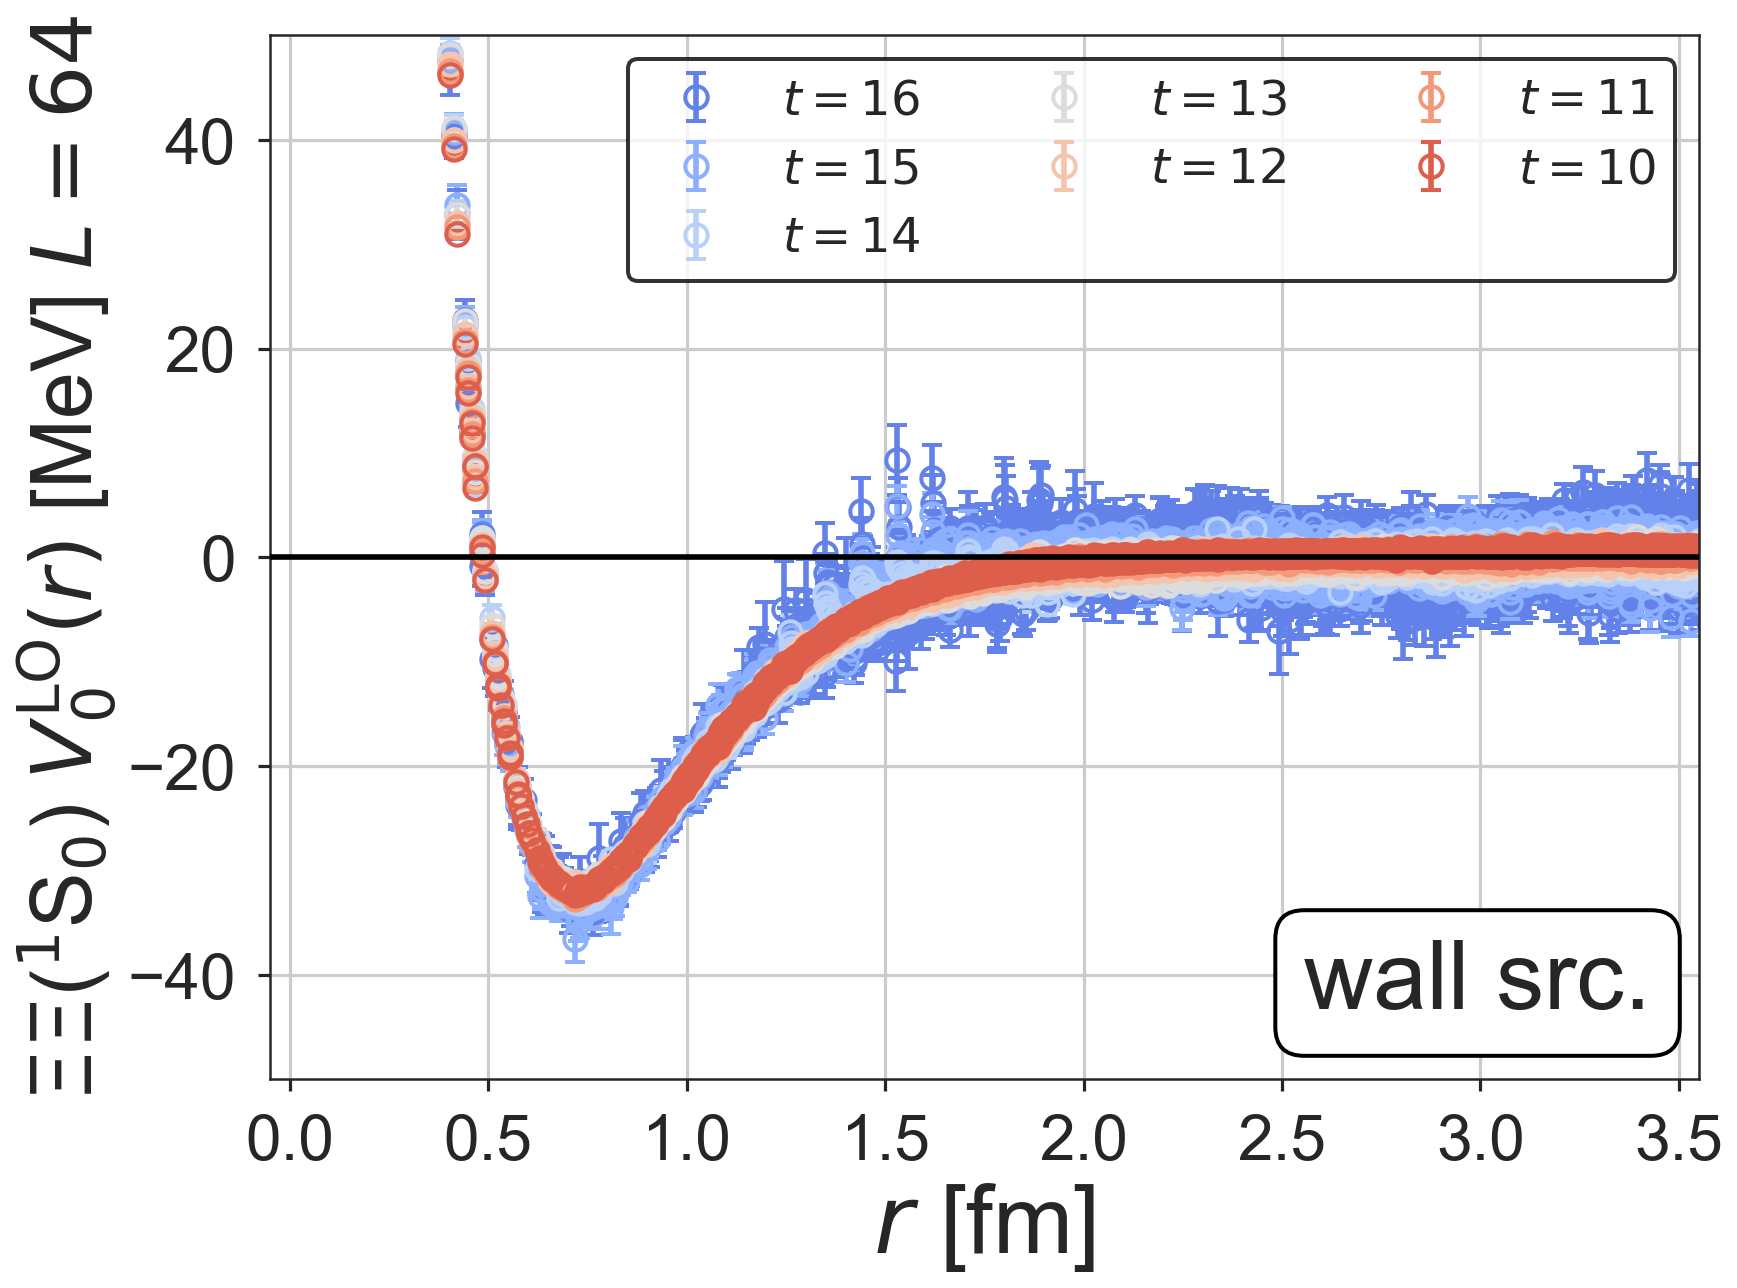

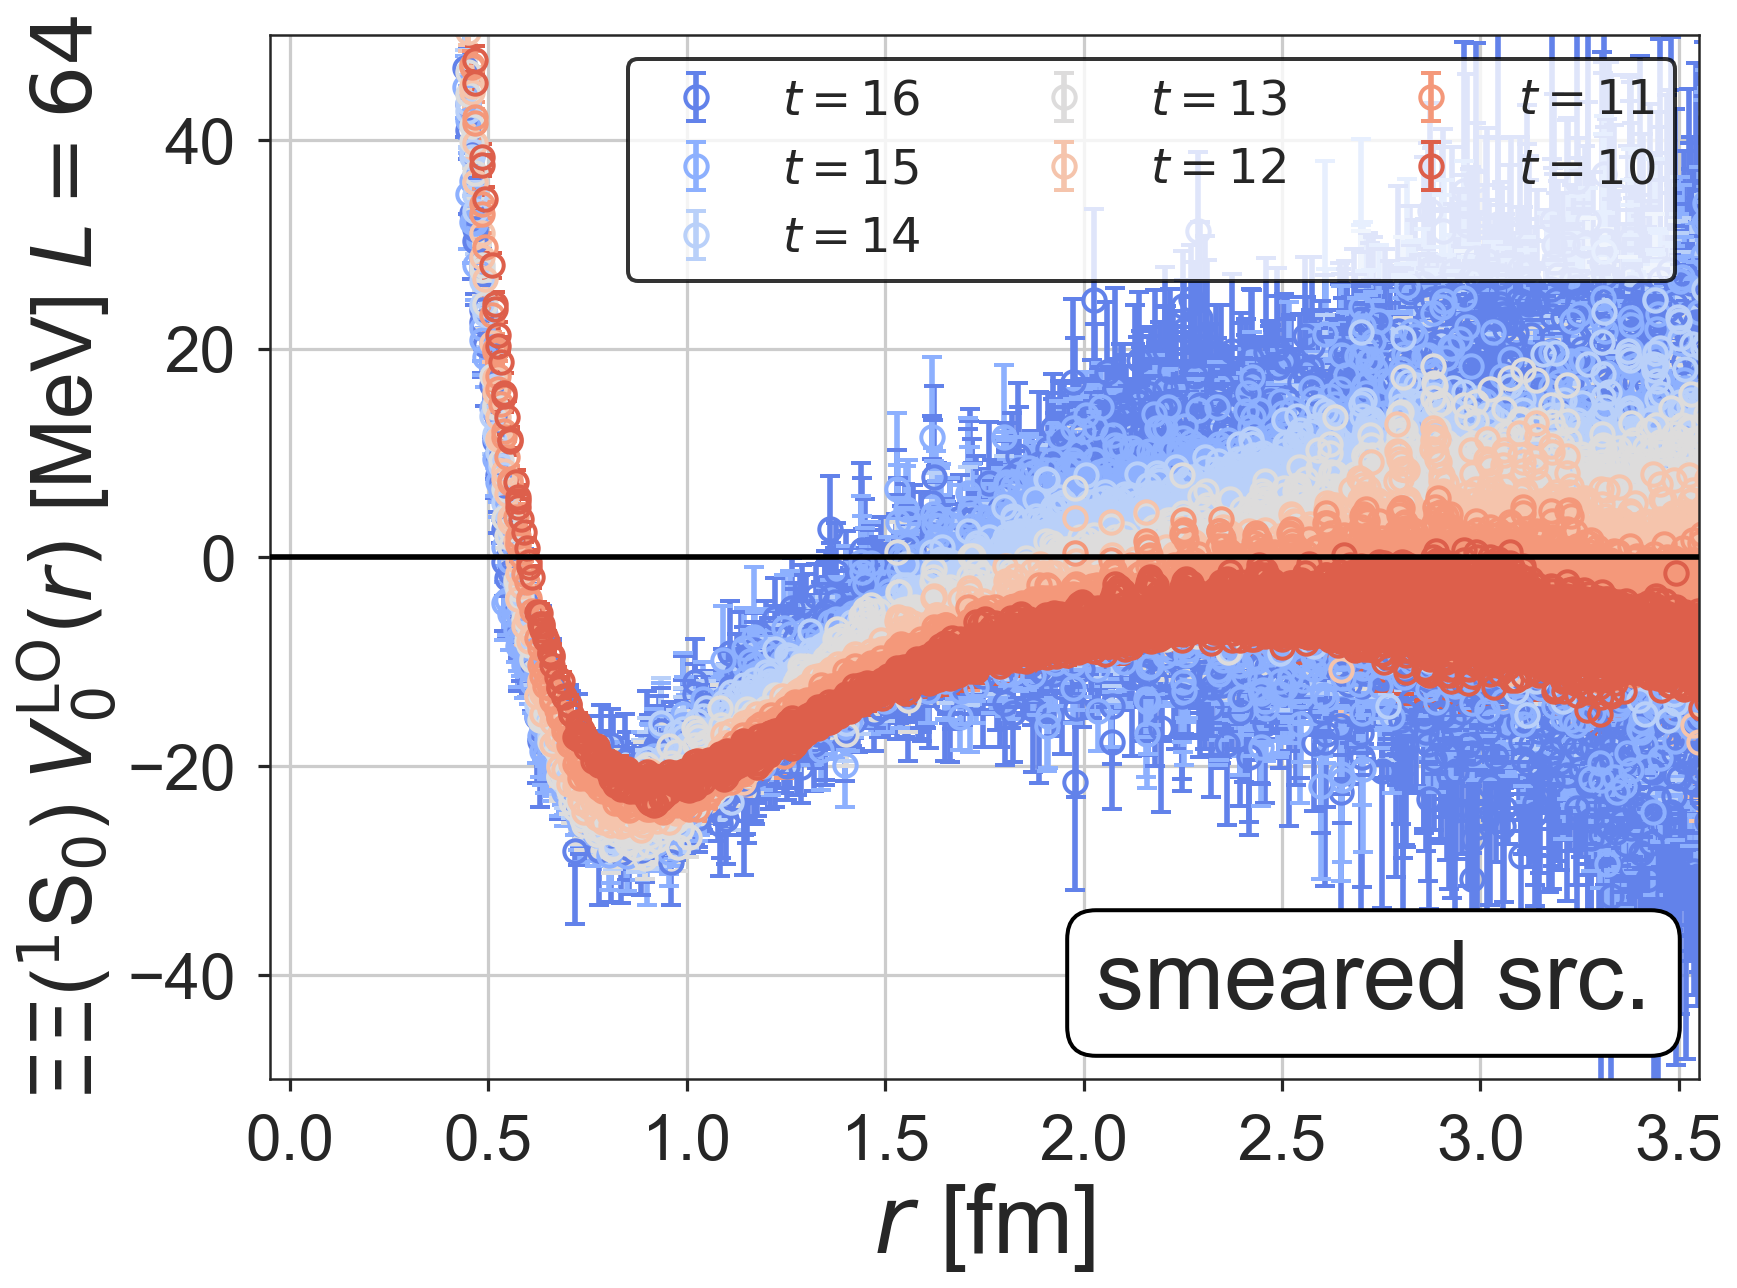

In [24]:
def plot_t_dep(src):
    t_list = [16, 15, 14, 13, 12, 11, 10]
    sns.set_palette(sns.color_palette('coolwarm', len(t_list)))
    fig, ax = plt.subplots()
    L = 64

    xr = (0, 3.5)
    yr = (-50, 50)
    for it in t_list:
        ax.errorbar(pot_LO[src][it][:,0]*lat_unit,
                    pot_LO[src][it][:,7]*ainv, pot_LO[src][it][:,8]*ainv,
                    capsize=5, capthick=2.0,
                   fmt='o', mfc='none', mew=2.0, label=r'$t = {}$'.format(it))

    leg = ax.legend(loc='upper right', frameon=True, ncol=3, fontsize=24)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)
    ax.set_xlim(-0.05, 3.55)
    ax.set_xticks(np.arange(0,3.55,0.5))
    ax.set_ylim(-50, 50)
    ax.grid()
    ax.set_xlabel(r'$r$ [fm]', fontsize=48)
    ax.set_ylabel(rf'$\Xi\Xi$($^1$S$_0$) $V_0^\mathrm{{LO}}(r)$ [MeV] $L = {L}$', fontsize=42)
    ax.axhline(0, c='black', zorder=3)
    props = dict(boxstyle='round', facecolor='white', linewidth=2, alpha=1.0)
    srclabel = {'wall': 'wall', 'exp': 'smeared'}[src]
    ax.text(xr[0]+0.98*(xr[1]-xr[0]), yr[0] + 0.05*(yr[1]-yr[0]), 
               rf'{srclabel} src.', fontsize=48, bbox=props,
               horizontalalignment='right',
               verticalalignment='bottom')
    fig.savefig(f'../figs/pot_LO/pot_LO_t_dep_L{L}_{src}.png', bbox_inches='tight')

plot_t_dep('wall')
plot_t_dep('exp')

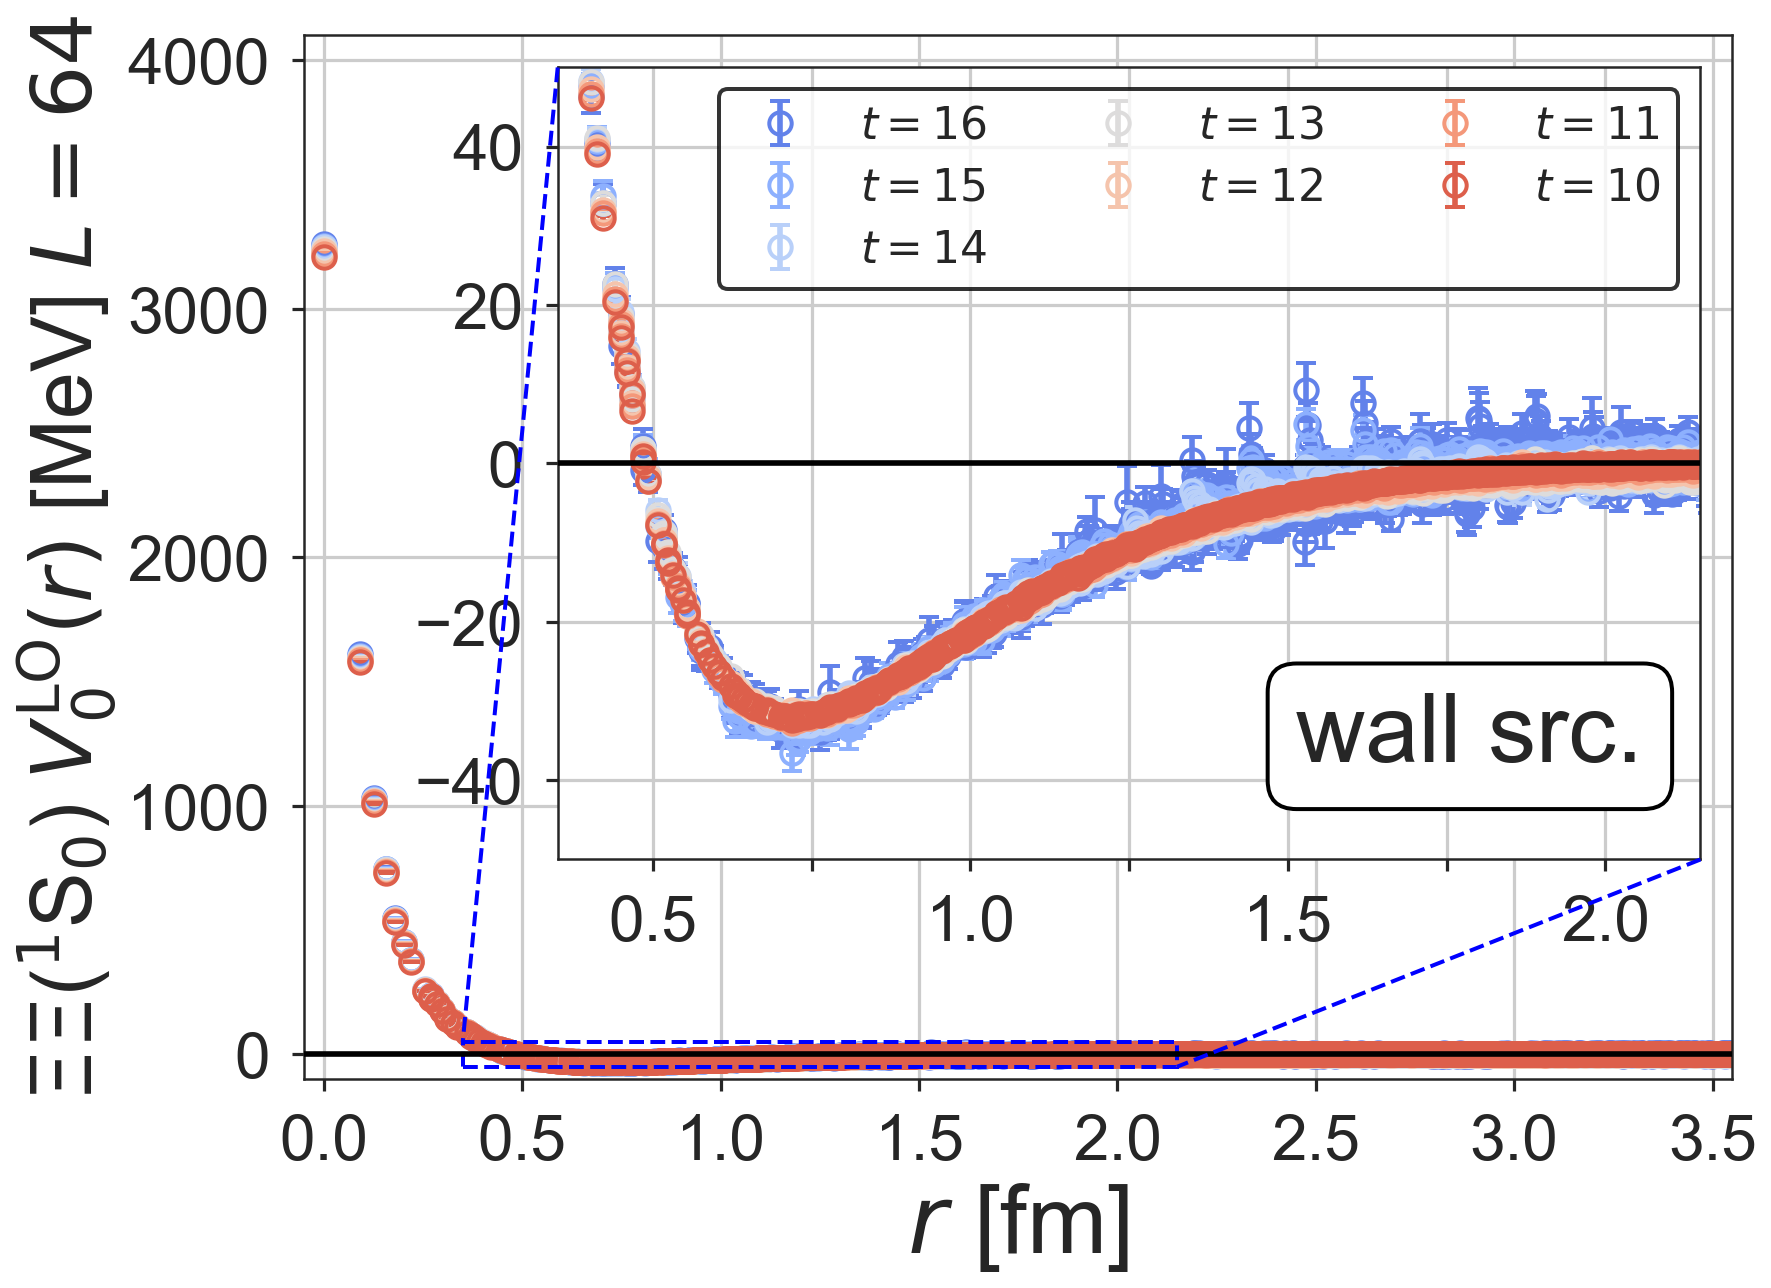

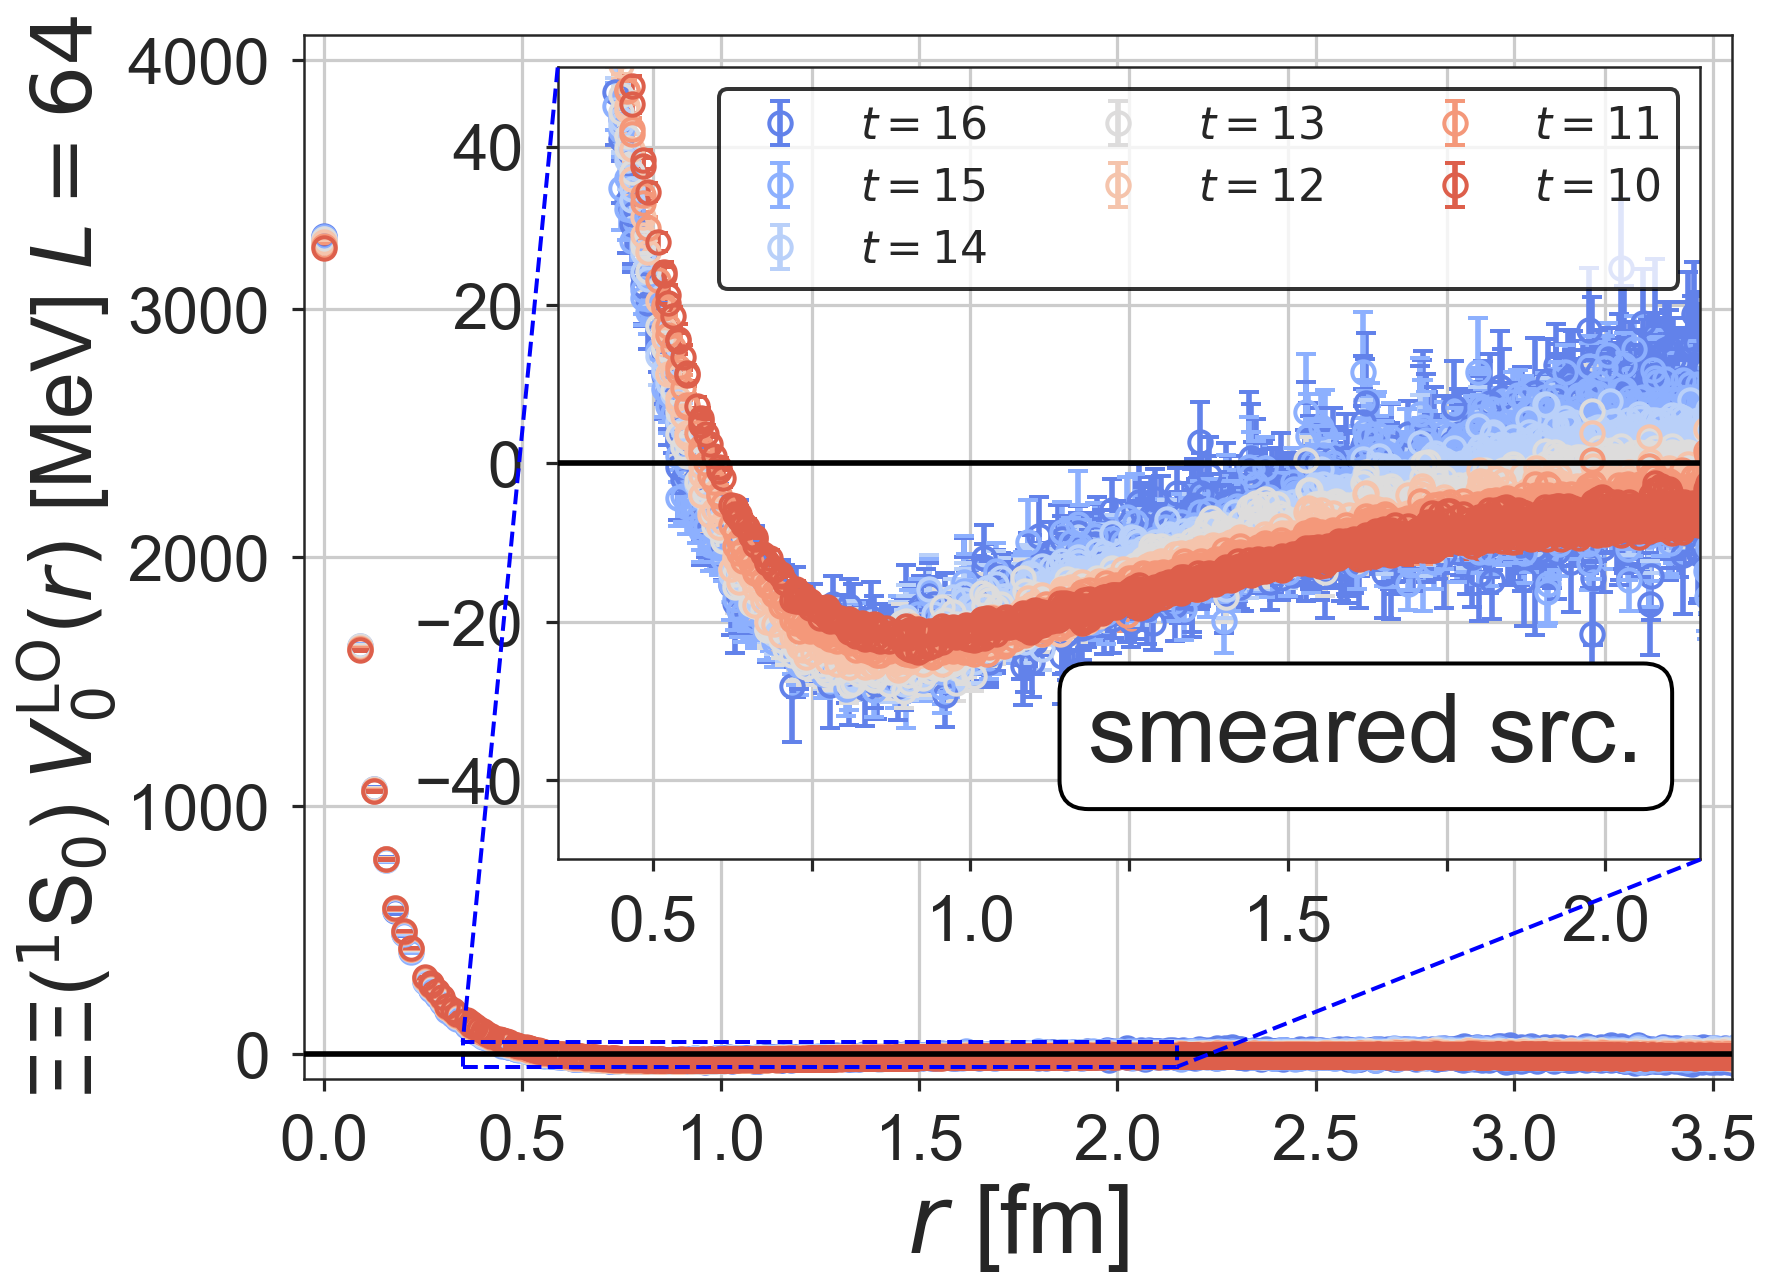

In [25]:
def plot_t_dep_w_zoom(src='wall'):
    t_list = [16, 15, 14, 13, 12, 11, 10]
    sns.set_palette(sns.color_palette('coolwarm', len(t_list)))
    fig, ax = plt.subplots()
    L = 64

    xr = (0, 3.5)
    yr = (-50, 50)
    for it in t_list:
        ax.errorbar(pot_LO[src][it][:,0]*lat_unit,
                    pot_LO[src][it][:,7]*ainv, pot_LO[src][it][:,8]*ainv,
                    capsize=5, capthick=2.0,
                   fmt='o', mfc='none', mew=2.0) #, label=r'$t = {}$'.format(it))

    ax.set_xlim(-0.05, 3.55)
    ax.set_xticks(np.arange(0,3.55,0.5))
    ax.set_ylim(-100, 4100)
    ax.grid()
    ax.set_xlabel(r'$r$ [fm]', fontsize=48)
    ax.set_ylabel(rf'$\Xi\Xi$($^1$S$_0$) $V_0^\mathrm{{LO}}(r)$ [MeV] $L = {L}$', fontsize=42)
    ax.axhline(0, c='black', zorder=3)
    
    axins = inset_axes(ax, width='80%', height=5.5, loc=1)
    for it in t_list:
        axins.errorbar(pot_LO[src][it][:,0]*lat_unit,
                    pot_LO[src][it][:,7]*ainv, pot_LO[src][it][:,8]*ainv,
                    capsize=5, capthick=2.0,
                   fmt='o', mfc='none', mew=2.0, label=r'$t = {}$'.format(it))
    axins.set_xlim(0.35, 2.15)
    axins.set_xticks(np.arange(0.5, 2.05, 0.25))
    axins.set_xticklabels([0.5, '', 1.0, '', 1.5, '', 2.0])
    axins.set_ylim(-50, 50)
    axins.grid()
    axins.axhline(0, c='black', zorder=3)
    
    leg = axins.legend(loc='upper right', frameon=True, ncol=3, fontsize=22)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)

    props = dict(boxstyle='round', facecolor='white', linewidth=2, alpha=1.0)
    srclabel = {'wall': 'wall', 'exp': 'smeared'}[src]
    xr = axins.get_xlim()
    yr = axins.get_ylim()
    axins.text(xr[0]+0.95*(xr[1]-xr[0]), yr[0] + 0.1*(yr[1]-yr[0]), 
               rf'{srclabel} src.', fontsize=48, bbox=props,
               horizontalalignment='right',
               verticalalignment='bottom')
    mark_inset(ax, axins, loc1=2, loc2=4, ls='--', lw=2, ec='blue', zorder=3)
    fig.savefig(f'../figs/pot_LO/pot_LO_t_dep_L{L}_{src}_w_zoom.png', bbox_inches='tight')

plot_t_dep_w_zoom(src='wall')
plot_t_dep_w_zoom(src='exp')